# Logistic Regression

### Module


In [148]:
import numpy as np
import matplotlib.pyplot as plt

from public_tests import *

### Load data


In [149]:
X_train, y_train = utils.load_data('./data/ex2data1.txt')
print("X_train.shape: ", X_train.shape, "y_train.shape: ", y_train.shape)
print("X_train type: ", type(X_train), "y_train type: ", type(y_train))
print(X_train[:5])
print(y_train[:5])

X_train.shape:  (100, 2) y_train.shape:  (100,)
X_train type:  <class 'numpy.ndarray'> y_train type:  <class 'numpy.ndarray'>
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
[0. 0. 0. 1. 1.]


In [150]:
print(X_train[True, 0])
print(X_train[True, 1])
print(X_train[True, 1].shape)


[[34.62365962 78.02469282]]
[[30.28671077 43.89499752]]
(1, 2)


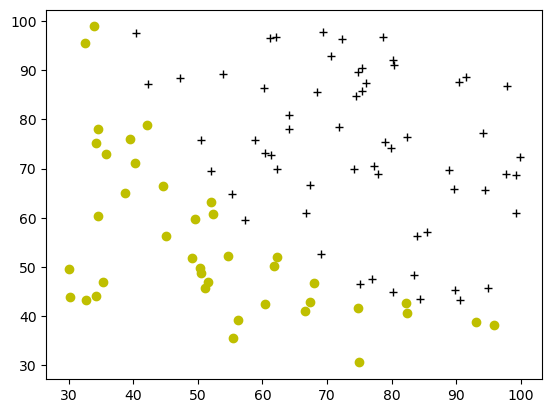

In [151]:
utils.plot_data(X_train, y_train, pos_label="Admitted", neg_label="Not admitted")

In [152]:
def sigmoid(z: np.ndarray): 
    g_z = 1 / (1 + np.exp(-z))
    return g_z


In [153]:
# Note: You can edit this value
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


In [155]:
def compute_cost(X: np.ndarray, y: np.ndarray, w: np.ndarray, b: float, *argv): 
    m, n = X.shape
    total_cost = 0
    
    for i in range(m): 
        f_wb_i = np.dot(X[i], w) + b
        g_z_i = sigmoid(f_wb_i)
        loss = -y[i] * np.log(g_z_i) - (1 - y[i]) * np.log(1 - g_z_i)
        total_cost += loss
    total_cost /= m
    return total_cost 
    

In [156]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [158]:
def compute_gradient(X: np.ndarray, y: np.ndarray, w: np.ndarray, b: float, *argv): 
    m, n = X.shape
    
    dj_dw = np.zeros(n)
    dj_db = 0
    
    
    for i in range(m): 
        f_wb_i = np.dot(X[i], w) + b
        g_z_i = sigmoid(f_wb_i)
        loss = g_z_i - y[i]
        for j in range(n): 
            dj_dw[j] += loss * X[i][j]
        
        dj_db += loss
        
    dj_dw /= m
    dj_db /= m
        
    return dj_db, dj_dw

In [159]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


In [161]:
def gradient_descent(X: np.ndarray, y: np.ndarray, w_in: np.ndarray, b_in: float, cost_function, gradient_function, alpha: float, num_iters: float, lambda_): 
    m, n = X.shape
    
    J_history = []
    w_history = []
    
    for i in range(num_iters): 
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)
        
        w_in -= alpha * dj_dw
        b_in -= alpha * dj_db
        
        if i < 100000: 
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
            
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
            
    return w_in, b_in, J_history, w_history
        
        
    

In [162]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96   


Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


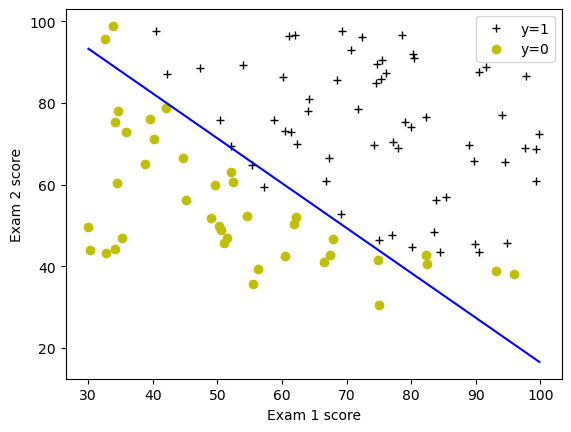

In [164]:
utils.plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

In [168]:
def predict(X: np.ndarray, w: np.ndarray, b: float): 
    m, n = X.shape
    
    p = np.zeros(m)
    
    for i in range(m): 
        f_wb_i = np.dot(X[i], w) + b
        g_z_i = sigmoid(f_wb_i)
        p[i] = 1 if g_z_i >= 0.5 else 0
        
    return p

In [169]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')


Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!
